# Logistic Regression

*Ordinary Linear Regression assumes that the response variable is normally distributed. Normal, or Gaussian, distribution describes the probability of an observation having a value between any two real numbers. Normally distributed data is symmetrical. Half of the valus are greater than the mean and half are less.  Mean = Median = Mode. Linear regression assumes that a constant change in a feaure causes change in the response variable.*

*Logistic regression is a form of binary classification in which an element an be put into one of two groups and is thus classified into the group to which it most closely belongs.*

In logistic regression:
- Response variable describes prbability that outcome is positive
- If response variable >= discrimination threshold then positive class
- Else, negative class
- Fuction of the linear combination of features using logistic function
    
* Logistic Function: $F(t) = \frac{1}{( 1 + e^{-t} )}$
* Logistic Regression: $F(x) = \frac{1}{1 + e^{-\beta_0 + \beta_x}}$
* Logic Function (Inverse of Logistic Function):
$g(x) = \ln{ \frac{F(x)}{1-F(x)} } = \beta_0 + \beta_x$
        
Example: Spam Filtering using the SMS spam collection dataset from the UCI
         machine learning respository
'''

In [24]:
import pandas as pd
df = pd.read_csv('./SMSSpamCollection', delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
print('Number of span messages: %s' % df[df[0] == 'spam'][0].count())
print('Number of ham messages: %s' % df[df[0] == 'ham'][0].count())

Number of span messages: 747
Number of ham messages: 4825


In [12]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# Split data into training and test sets
# By default, train_test_split assigns 75% of data to the training set and the remaining 25% to the test set
X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)

# Create TfidfVectorizer and fit it with voth the training and test messages
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

# Create an instance of LogisticRegression and train the model using .fit (same as LinearRegression)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:5]):
    print('Predicted: %s message: %s' % (prediction, X_test_raw[i]))

Predicted: ham message: The whole car appreciated the last two! Dad and are having a map reading semi argument but apart from that things are going ok. P.
Predicted: ham message: At WHAT TIME should i come tomorrow
Predicted: ham message: I will lick up every drop :) are you ready to use your mouth as well?
Predicted: ham message: What i mean is do they come chase you out when its over or is it stated you can watch as many movies as you want.
Predicted: spam message: December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update Co FREE on 08002986906 


# Binary Classification Performance Metrics

### Some common performance metrics are:
* Accuracy
* Precision
* Recall
* F1 Measure
* ROC AUC Score

All of these metrics depend on the concepts of True-Positives, True-Negatives, False-Positives, and False-Negatives.
In this case the positives and negatives are based on the correct prediction of Spam vs Ham messages. A confusion
matrix/contigency table can be used to visualized true and false negatives/positives:
* Rows - true classes
* Colums - predicted classes

[[4 1]
 [2 3]]


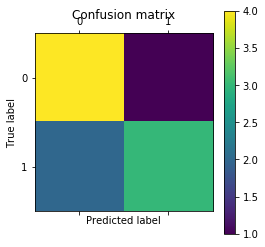

In [13]:
# Binary classification performance metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Shows 4 true negative predictions, 3 true positive predictions,
# 2 false negative predictions, and 1 false positive prediction

In [16]:
# Accuracy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv('./sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state=11)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies: [0.95221027 0.95454545 0.96172249 0.96052632 0.95209581]
Mean accuracy: 0.9562200683094717


### Shortcomings of accuracy
* Does not distinguish between false positives and negatives
* Not an informative metric if proportions are skewed
* Solution - precision and recall

**Precision** - *fraction of messages classified as spam that are actually spam*  
**Recall** - *fraction of truly positive instances that classifier recognized*
(Recall = 1, classifier did not make false negative predictions)

In [21]:
# Precision and recall for the above SMS classifier
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print('Precision: %s' % np.mean(precisions))
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Recall: %s' % np.mean(recalls))

Precision: 0.992542742398164
Recall: 0.6836050302748021


## F1 Measure
* The harmonic mean of precision and recall scores
* Penalizes classifiers with imbalanced precision and recall scores
* Perfect precision and recall scores -> F1 score = 1
* Perfect precision and recall score = 0 -> F1 score = 0

Permutations of the F1-score include the F0.5-score and the F2-score which bias
precision over recall and recall over precision respectively

In [23]:
# F1-Score of SMS classifier
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print('F1 score: %s' % np.mean(f1s))

F1 score: 0.8090678466269784


## ROC AUC Score
* ROC (Reciver Operating Characteristic) visualizes classifier's performance
* Plot the classifier's recall against fall-out
* Fall out is the number of false positives divded by the total number of negatives
* AUC is the area under the ROC curve

$F = \frac{FP}{TN + FP}$

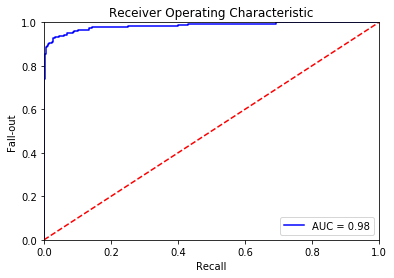

In [25]:
predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Fall-out')
plt.show()

# Given an AUC of 0.98 (most of the area is under the curve) the ROC out performs random guessing